<a href="https://colab.research.google.com/github/jpradeesh3800/ml/blob/master/Linear_Regression_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd



1.   Comment = '\t'  =>  ignores the info after a tab in each line
2.   sep = ' ' => as columns are separated by space
3.   na_values = '?' => replaces the Nan values with '?'
4.   skipinitialspace = True => Removes the extra space after delimiter









*For Better UnderStanding Download the file manully and view it in text format.*

In [0]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
df  = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
                  names=column_names,sep=' ',comment='\t',skipinitialspace = True,na_values='?')

In [19]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [9]:
df.shape

(398, 1)

In [21]:
df.Origin.unique()

array([1, 3, 2])

In [22]:
df['Model Year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

*Hence Origin and Model Year are Categorical*





In [23]:
df.Cylinders.unique()

array([8, 4, 6, 3, 5])

In [24]:
df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
Origin            int64
dtype: object

In [27]:
df.isnull().any()

MPG             False
Cylinders       False
Displacement    False
Horsepower       True
Weight          False
Acceleration    False
Model Year      False
Origin          False
dtype: bool

In [28]:
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

```Since There are only 6 na values out of 398 examples. We can simply drop those rows```

In [0]:
df = df.dropna()

In [30]:
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

```Although origin and model Year is a categorical feature,we are assuming it as numerical feature.If required, pop origin and model Year column and add 3 and 13 categoical features into df respectively```




In [0]:
# Splitting data using Pandas
train_data = df.sample(frac=0.8,random_state=0)
test_data = df.drop(train_data.index)
train_labels = train_data.pop('MPG')
test_labels = test_data.pop("MPG")

In [36]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(128,activation='relu',input_shape=(7,)),
                             tf.keras.layers.Dense(1)
])
model.compile(
    optimizer = 'adam',
    loss = 'mae',
    metrics=['mae','mse']
)
model.fit(train_data,train_labels,epochs=10)

Train on 314 samples
Epoch 1/10
314/314 [==============================] - 0s 237us/sample - loss: 80.2913 - mean_absolute_error: 80.2914 - mean_squared_error: 11888.6807
Epoch 2/10
314/314 [==============================] - 0s 68us/sample - loss: 20.5540 - mean_absolute_error: 20.5540 - mean_squared_error: 667.6259
Epoch 3/10
314/314 [==============================] - 0s 59us/sample - loss: 15.3507 - mean_absolute_error: 15.3507 - mean_squared_error: 345.4334
Epoch 4/10
314/314 [==============================] - 0s 59us/sample - loss: 11.7695 - mean_absolute_error: 11.7695 - mean_squared_error: 198.6384
Epoch 5/10
314/314 [==============================] - 0s 51us/sample - loss: 9.4190 - mean_absolute_error: 9.4190 - mean_squared_error: 137.1700
Epoch 6/10
314/314 [==============================] - 0s 50us/sample - loss: 7.4310 - mean_absolute_error: 7.4310 - mean_squared_error: 87.6182
Epoch 7/10
314/314 [==============================] - 0s 62us/sample - loss: 6.1779 - mean_absolute

In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               1024      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [49]:
results = model.evaluate(test_data,test_labels)
for x,y in zip(model.metrics_names,results):
    print("{:20s}:{}".format(x,y))

78/78 [==============================] - 0s 73us/sample - loss: 4.9879 - mean_absolute_error: 4.9879 - mean_squared_error: 43.6871
loss                :4.987913156167055
mean_absolute_error :4.987913131713867
mean_squared_error  :43.68705368041992


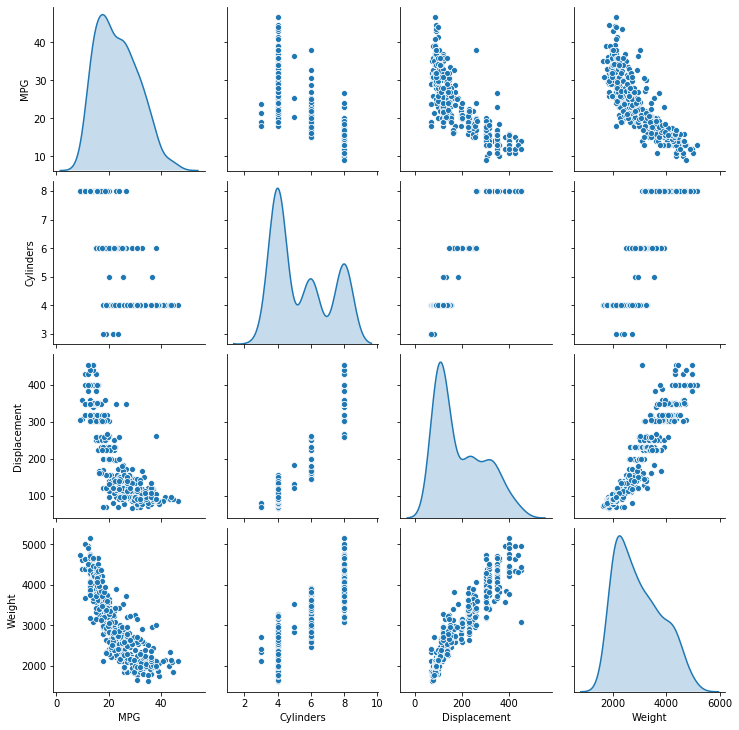

In [41]:
import seaborn as sns
sns.pairplot(df[['MPG',"Cylinders","Displacement","Weight"]],diag_kind='kde')

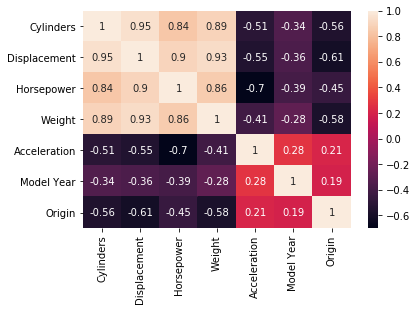

In [52]:
correlation_matrix = train_data.corr().round(2)
sns.heatmap(data = correlation_matrix,annot= True)

From This Correlation Matrix ,We can observe that
1.   Cylinders
2.   Displacements
3.   Horsepower
4.   Weight

These 4 features are closely related as their correlation is close to 1.
We can also observe that Displacement and other 3 features are more than 0.9
Hence,Lets Train a model where Cylinders,Weight,Horsepower being removed and check its accuracy.


In [59]:
simple_model = tf.keras.Sequential([
                             tf.keras.layers.Dense(128,activation='relu',input_shape=(4,)),
                             tf.keras.layers.Dense(1)
])
simple_model.compile(
    optimizer = 'adam',
    loss = 'mae',
    metrics=['mae','mse']
)
train_X =train_data[['Acceleration','Model Year','Origin',"Displacement"]]
simple_model.fit(train_X,train_labels,epochs=10)

Train on 314 samples
Epoch 1/10
314/314 [==============================] - 0s 237us/sample - loss: 13.0979 - mean_absolute_error: 13.0979 - mean_squared_error: 232.3353
Epoch 2/10
314/314 [==============================] - 0s 55us/sample - loss: 7.8127 - mean_absolute_error: 7.8127 - mean_squared_error: 92.8598
Epoch 3/10
314/314 [==============================] - 0s 49us/sample - loss: 4.5590 - mean_absolute_error: 4.5590 - mean_squared_error: 33.7890
Epoch 4/10
314/314 [==============================] - 0s 52us/sample - loss: 3.3257 - mean_absolute_error: 3.3257 - mean_squared_error: 18.5970
Epoch 5/10
314/314 [==============================] - 0s 52us/sample - loss: 3.1702 - mean_absolute_error: 3.1702 - mean_squared_error: 16.7488
Epoch 6/10
314/314 [==============================] - 0s 52us/sample - loss: 2.8617 - mean_absolute_error: 2.8617 - mean_squared_error: 15.1557
Epoch 7/10
314/314 [==============================] - 0s 52us/sample - loss: 2.8624 - mean_absolute_error: 2.86

In [60]:
simple_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               640       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________


*No of Parameters has decreased by a factor of 2 approx*

In [61]:
test_X =test_data[['Acceleration','Model Year','Origin',"Displacement"]]
results = simple_model.evaluate(test_X,test_labels)
for x,y in zip(simple_model.metrics_names,results):
    print("{:20s}:{}".format(x,y))

78/78 [==============================] - 0s 477us/sample - loss: 2.4938 - mean_absolute_error: 2.4938 - mean_squared_error: 12.4942
loss                :2.4937552916697965
mean_absolute_error :2.493755340576172
mean_squared_error  :12.494185447692871


*We can observe that Loss has decreased by a factor of 2. Removing some features has drastically improved the performance.*

*We can also make origin column as categorical feature to obtain more accuracy*

In [65]:
simple_model2 = tf.keras.Sequential([
                             tf.keras.layers.Dense(128,activation='relu',input_shape=(6,)),
                             tf.keras.layers.Dense(1)
])
simple_model2.compile(
    optimizer = 'adam',
    loss = 'mae',
    metrics=['mae','mse']
)
train_X =train_data[['Acceleration','Model Year',"Displacement"]]
train_X['origin1'] = 1.0*(train_data['Origin'] == 1)
train_X['origin2'] = 1.0*(train_data['Origin'] == 2)
train_X['origin3'] = 1.0*(train_data['Origin'] == 3)
print(train_X.head())
simple_model2.fit(train_X,train_labels,epochs=10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



     Acceleration  Model Year  Displacement  origin1  origin2  origin3
146          14.5          74          90.0      1.0      0.0      0.0
282          17.3          79         140.0      1.0      0.0      0.0
69           13.5          72         350.0      1.0      0.0      0.0
378          14.7          82         105.0      1.0      0.0      0.0
331          18.0          80          97.0      0.0      0.0      1.0
Train on 314 samples
Epoch 1/10
314/314 [==============================] - 0s 304us/sample - loss: 16.1512 - mean_absolute_error: 16.1512 - mean_squared_error: 348.2477
Epoch 2/10
314/314 [==============================] - 0s 67us/sample - loss: 12.5856 - mean_absolute_error: 12.5856 - mean_squared_error: 210.1614
Epoch 3/10
314/314 [==============================] - 0s 60us/sample - loss: 7.3734 - mean_absolute_error: 7.3734 - mean_squared_error: 83.1557
Epoch 4/10
314/314 [==============================] - 0s 56us/sample - loss: 3.8097 - mean_absolute_error: 3.8097 

In [66]:
simple_model2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 128)               896       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 129       
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


In [69]:
test_X =test_data[['Acceleration','Model Year',"Displacement"]]
test_X['origin1'] = 1.0*(test_data.Origin == 1)
test_X['origin2'] = 1.0*(test_data.Origin == 2)
test_X['origin3'] = 1.0*(test_data.Origin == 3)
results = simple_model2.evaluate(test_X,test_labels)
for x,y in zip(simple_model2.metrics_names,results):
    print("{:20s}:{}".format(x,y))

78/78 [==============================] - 0s 95us/sample - loss: 2.4444 - mean_absolute_error: 2.4444 - mean_squared_error: 11.3079
loss                :2.4444015881954093
mean_absolute_error :2.444401741027832
mean_squared_error  :11.307881355285645


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

